In [5]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Linear Regrression

In [48]:
size = 100
true_intercept = -2
true_slope = 5

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * (x)
# add noise
y = true_regression_line + np.random.normal(scale=2, size=size)

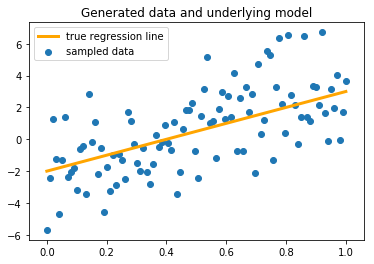

In [49]:

plt.scatter(x, y,label='sampled data')
plt.title('Generated data and underlying model')
plt.plot(x, true_regression_line, label='true regression line', lw=3, color = 'orange')
plt.legend(loc=0);

In [50]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sd=50)
    x_coeff = pm.Normal('x_coeff', 0, sd=50)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * (x),
                        sd=sigma, observed=y)

    # Inference!
    trace = pm.sample(5000, njobs=3) # draw 5000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/lib/python3.5/dist-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 5500/5500 [00:12<00:00, 446.14it/s]
/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 2 does not match the target. It is 0.8919635945032917, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))


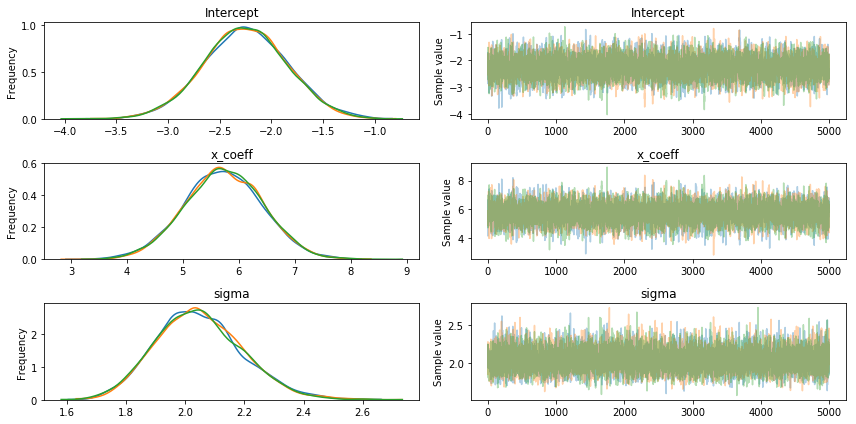

In [51]:
_ = pm.traceplot(trace)

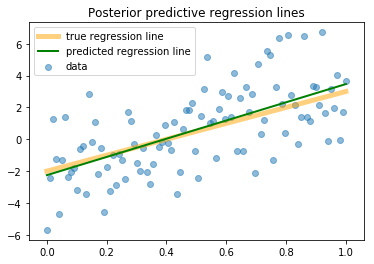

In [52]:
plt.scatter(x, y, label='data', alpha = 0.5)
plt.plot(x, true_regression_line, label='true regression line', lw=5, color = 'orange', alpha = 0.5)
predicted = trace['x_coeff'].mean()*(x) + trace['Intercept'].mean()
plt.plot(x,predicted, lw = 2, color = 'green', label = 'predicted regression line')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)

In [19]:
# A/B Testing

In [43]:
true_p_A = 0.05
true_p_B = 0.04
N_A = 1500
N_B = 750


obs_A = np.random.binomial(1, true_p_A, size=N_A)
obs_B = np.random.binomial(1, true_p_B, size=N_B)

with pm.Model() as ab_testing_model:
    p_A = pm.Beta('p_A', alpha = 1, beta = 1)
    p_B = pm.Beta('p_B', alpha = 1, beta = 1)
    delta = pm.Deterministic('delta',p_A - p_B)
    obs_A = pm.Bernoulli('obs_A', p_A, observed=obs_A)
    osb_B = pm.Bernoulli('obs_B', p_B, observed=obs_B)

with ab_testing_model:
    trace = pm.sample(5000, njobs = 5)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/lib/python3.5/dist-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 5500/5500 [00:11<00:00, 495.23it/s]


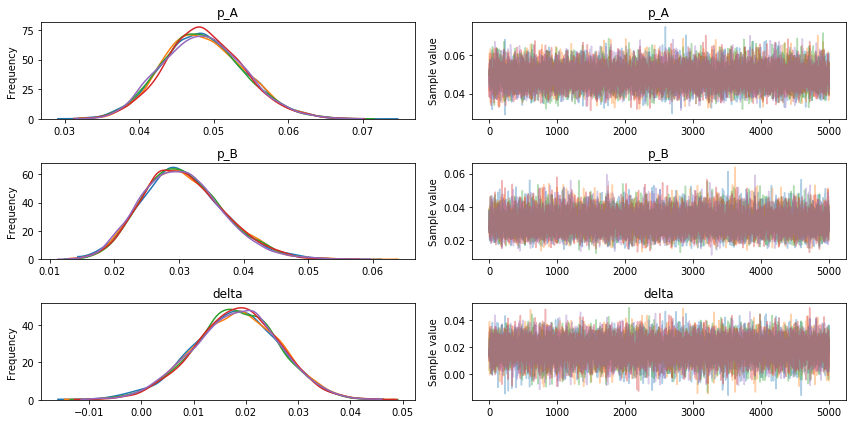

In [44]:
_ = pm.traceplot(trace, varnames = ['p_A','p_B','delta'])

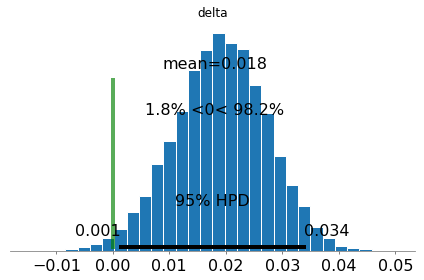

In [45]:
_ = pm.plot_posterior(trace, varnames=['delta'], ref_val=0)
#_ = plt.hist(trace['p_A'] - trace['p_B'], bins = 100, alpha = 0.5)

In [46]:
(trace['delta'] > 0).mean()*100 

98.188

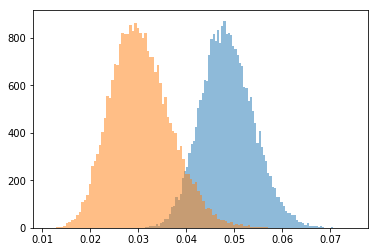

In [47]:
_ = plt.hist(trace['p_A'], bins = 100, alpha = 0.5)
_ = plt.hist(trace['p_B'], bins = 100, alpha = 0.5)